In [25]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.shape

(21, 2)

In [4]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

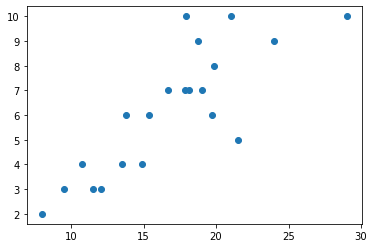

In [5]:
plt.scatter(x='Delivery Time',y='Sorting Time',data=df)
plt.show()

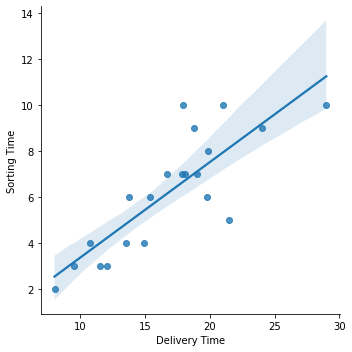

In [6]:
sns.lmplot(x='Delivery Time',y='Sorting Time',data=df)
plt.show()

In [7]:
df.rename(columns={'Delivery Time':'dt','Sorting Time':'st'},inplace=True)

In [8]:
df

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
import statsmodels.formula.api as smf

In [10]:
linear_model=smf.ols(formula='dt~st',data=df)

In [11]:
linear_model=linear_model.fit()

In [12]:
linear_model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [13]:
xx=pd.DataFrame(data=df)

In [14]:
df

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [15]:
y_predicted = linear_model.predict(xx)

In [16]:
y_predicted1 = pd.DataFrame(y_predicted)

In [17]:
df["predicted"] = y_predicted1

In [18]:
xx

,dt,st,predicted
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [19]:
df

,dt,st,predicted
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [20]:
y=df['dt']

In [22]:
from sklearn.metrics import mean_squared_error,r2_score
print('mean square error is :',mean_squared_error(y,y_predicted1))
print('r2 score is :',r2_score(y,y_predicted1))

mean square error is : 7.793311548584062
r2 score is : 0.6822714748417231


In [23]:
# logical transformation

In [26]:
x_log=np.log(df['st']).values.reshape(-1,1)
y_log=np.log(df['dt']).values.reshape(-1,1)

In [27]:
log_model=smf.ols(formula='y_log~x_log',data=df).fit()

In [28]:
log_model.params

Intercept    1.741987
x_log        0.597522
dtype: float64

In [29]:
y_pred=log_model.predict(df)

In [30]:
print('mean square error is :',mean_squared_error(y_log,y_pred))
print('r 2 score :',r2_score(y_log,y_pred))

mean square error is : 0.021973058112488137
r 2 score : 0.77216134926874


In [31]:
#sqrt transformation

In [32]:
sqrt_x=(df['st']**(1/2)).values.reshape(-1,1)
sqrt_y=(df['dt']**(1/2)).values.reshape(-1,1)

In [34]:
sqrt_model=smf.ols(formula='sqrt_y~sqrt_x',data=df).fit()

In [35]:
sqrt_model.params

Intercept    1.613479
sqrt_x       1.002217
dtype: float64

In [36]:
y_pred1=sqrt_model.predict(df)

In [38]:
print('mean square error is :',mean_squared_error(sqrt_y,y_pred1))
print('r2 score :',r2_score(sqrt_y,y_pred1))

mean square error is : 0.10106690385613769
r2 score : 0.7292011987544664


In [39]:
#resiprocal transformation

In [40]:
rcp_x=(1/df['st']).values.reshape(-1,1)
rcp_y=(1/df['dt']).values.reshape(-1,1)

In [42]:
rcp_model=smf.ols(formula='rcp_y~rcp_x',data=df).fit()

In [43]:
rcp_model.params

Intercept    0.026629
rcp_x        0.196163
dtype: float64

In [44]:
y_pred2=rcp_model.predict(df)

In [45]:
print('mean square erroe :',mean_squared_error(rcp_y,y_pred2))
print('r2 score :',r2_score(rcp_y,y_pred2))

mean square erroe : 7.88917718400201e-05
r2 score : 0.8354583624350859
